# Here, we will add active column to Union test data from MoDac. 

### Please note that we have already done similar curation on individual DTC, Excape and ChEMBL 'raw' data as earlier stages. Now, we will use active column of those individual dataset to find active value of each compound on union train and testset by matching the rdkit_smiles and compound_id.

Titli Sarkar
March 15, 2023

In [1]:
import importlib as imp
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [10,5]
#pal = sns.color_palette("Set2")
plt.rcParams['font.size'] = 5

In [2]:
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data

In [42]:
# Just run all cells with changing target you want
target = 'CYP3A4'

In [43]:
data_dir = "/mnt/projects/ATOM/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/"+target.upper()+'-ampl-1.1.0/'
!ls $data_dir

CHEMBL25-CYP3A4_human_IC50_26Nov2019.txt
cyp3a4_chembl_smiles_active.csv
cyp3a4_chembl_smiles_active_th5.csv
cyp3a4_chembl_testset_base_smiles_union_active.csv
cyp3a4_chembl_testset_base_smiles_union.csv
cyp3a4_dtc_smiles_active.csv
cyp3a4_dtc_smiles_active_th5.csv
cyp3a4_dtc_smiles.csv
cyp3a4_dtc_testset_base_smiles_union_active.csv
cyp3a4_dtc_testset_base_smiles_union.csv
cyp3a4_excape_smiles_active.csv
cyp3a4_excape_smiles_active_th5.csv
cyp3a4_excape_smiles.csv
cyp3a4_excape_testset_base_smiles_union_active.csv
cyp3a4_excape_testset_base_smiles_union.csv
cyp3a4_union_testset_base_smiles.csv
cyp3a4_union_testset_base_smiles_with_mordred_filtered_descriptors.csv
cyp3a4_union_test_smiles_active.csv
cyp3a4_union_test_smiles_active_th5.csv
cyp3a4_union_trainset_base_smiles.csv
cyp3a4_union_trainset_base_smiles_train_valid_test_scaffold_3c072810-f47b-49ef-9365-6ffa9e5bf911.csv
cyp3a4_union_trainset_base_smiles_with_mordred_filtered_descriptors.csv
scaled_descriptors


In [44]:
file = data_dir + target.lower()+'_union_trainset_base_smiles.csv' # exisitng MoDaC raw
union_test_df = pd.read_csv(file,sep=",",engine="python",error_bad_lines=False) # Note that my orig_df is MoDaC files, you should use the raw file downloaded form ExcapeDB
print(union_test_df.shape)
union_test_df.head()

(17796, 5)


/home/sarkart4/miniconda3/envs/ampl-1.4.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,base_rdkit_smiles,compound_id,pIC50,relation,active
0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN,1
1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<,0
2,COc1ccc(C(C(=O)NC2CCCC2)N(C(=O)c2snc(-c3ccc(F)...,AMKHNFFZBIGCEX-ZYMSVLFVNA-N,4.900000,<,0
3,CN1CCN(CCCN(C(=O)Nc2ccc(F)c(C(F)(F)F)c2)C2CCC3...,CHEMBL1289614,7.300577,NaN,1
4,CCOc1cc(C(=O)NC(CC(=O)O)c2ccccc2C)nn1-c1ccccc1F,MLFFCILPEDOIHN-KRWDZBQOSA-N,7.823909,NaN,1


In [45]:
union_test_df.columns

Index(['base_rdkit_smiles', 'compound_id', 'pIC50', 'relation', 'active'], dtype='object')

In [46]:
# drop old active column
union_test_df = union_test_df.drop(columns = ['active'])
print(union_test_df.shape) # Note: wrong 'active' column, will be marked correctly in next step
union_test_df.head(2)

(17796, 4)


,base_rdkit_smiles,compound_id,pIC50,relation
0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN
1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<



### Apply standard ATOM curation steps

In [47]:
imp.reload(dcf)
data=union_test_df
column = 'pIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'compound_id'
smiles_col = 'base_rdkit_smiles'
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, 
                                                     max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# note: checked that this is already curated
[check_df.shape]
check_df.head()

Bad duplicates removed from dataset
Dataframe size (17796, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, pIC50, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (17796, 8)
New column created with averaged values:  VALUE_NUM_mean


,base_rdkit_smiles,compound_id,pIC50,relation,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN,5.441849,NaN,0.0,0
1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<,4.800000,NaN,0.0,0
2,COc1ccc(C(C(=O)NC2CCCC2)N(C(=O)c2snc(-c3ccc(F)...,AMKHNFFZBIGCEX-ZYMSVLFVNA-N,4.900000,<,4.900000,NaN,0.0,0
3,CN1CCN(CCCN(C(=O)Nc2ccc(F)c(C(F)(F)F)c2)C2CCC3...,CHEMBL1289614,7.300577,NaN,7.300577,NaN,0.0,0
4,CCOc1cc(C(=O)NC(CC(=O)O)c2ccccc2C)nn1-c1ccccc1F,MLFFCILPEDOIHN-KRWDZBQOSA-N,7.823909,NaN,7.823909,NaN,0.0,0


In [48]:
check_df.columns

Index(['base_rdkit_smiles', 'compound_id', 'pIC50', 'relation',
       'VALUE_NUM_mean', 'VALUE_NUM_std', 'Perc_Var', 'Remove_BadDuplicate'],
      dtype='object')

Post-processing dataset

Total Number of results = 17796
dataset mean = 5.19002940583703 NM
dataset stdev = 0.7306274284934289 NM
dataset max = 10.66 NM
dataset min = 1.3 NM



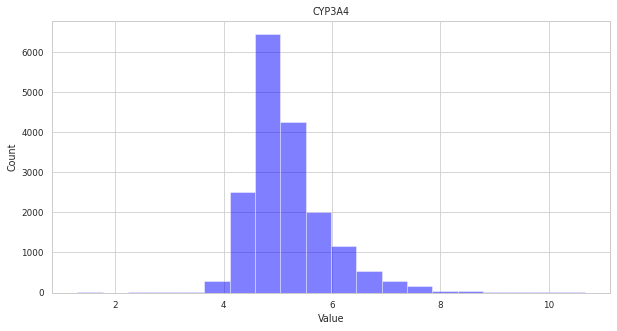

In [49]:
imp.reload(curate_data)
targ_lst = [target.upper()]
column = 'pIC50'
num_bins = 20
units = 'NM'
filepath = ""
for it in range(len(targ_lst)) :
    title = targ_lst[it]
    data=check_df
    curate_data.summarize_data(column, num_bins, title, units, filepath, data)

## Use Kevin's "aggregate_assay_data" to add 'active' column

In [50]:
imp.reload(curate_data)
tolerance=10
column='pIC50'   #'pXC50'; #'standard_value'
list_bad_duplicates='Yes'
max_std=1
agg_data=check_df
data=agg_data
print("before",data.shape)
temp_df=curate_data.aggregate_assay_data(data, value_col=column, output_value_col=None,
                             label_actives=True,
                             active_thresh=6, # val > 6 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                             id_col='compound_id', smiles_col='base_rdkit_smiles', relation_col='relation')
                             #id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')
# Remove inf in curated_df
temp_df = temp_df[~temp_df.isin([np.inf]).any(1)]
print("after",temp_df.shape)
temp_df.head()

before (17796, 8)
after (17796, 5)


,compound_id,base_rdkit_smiles,relation,pIC50,active
0,IFEXCZMSTXWJSK-VQTJNVASSA-N,O=C(Nc1ccc(S(=O)(=O)c2cccc(OC(F)(F)F)c2)cc1)C1...,,6.618848,1
1,IKBHCHNXQACDSM-UBOZLPQGNA-N,CCC1=C(OC(=O)N(CC)CC)N2C(=O)OC(=NCC3CC3)[C@]2(...,,5.300000,0
2,BVMYNIUPRXUZKB-LNNLXFCONA-N,CCCc1ccc(-c2cc(C(=O)NN3CCOCC3)c3ccccc3n2)cc1,<,4.900000,0
3,CHEMBL231609,Cc1cc(C(=O)NC2CCCC2)cc2[nH]c(-c3c(NCC(O)c4cccc...,,5.795880,0
4,RTAOSKPTWQTCBX-GIWSTSDLSA-N,CC(C)(c1ncc(-c2ccccn2)o1)N1CCN(CC(O)CC(Cc2cccc...,,5.301030,0


In [51]:
# Add 'active' column to original data and save file to FRCE
merged = pd.merge(left=union_test_df, right=temp_df, how='left', left_on='base_rdkit_smiles', right_on='base_rdkit_smiles')
merged = merged.drop(columns=['compound_id_y', 'relation_y', 'pIC50_y'])
merged = merged.rename(columns={'compound_id_x':'compound_id', 'relation_x':'relation', 'pIC50_x':'pIC50'})
print(merged.shape, union_test_df.shape)
merged.head(5)

(17796, 5) (17796, 4)


,base_rdkit_smiles,compound_id,pIC50,relation,active
0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN,0.0
1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<,0.0
2,COc1ccc(C(C(=O)NC2CCCC2)N(C(=O)c2snc(-c3ccc(F)...,AMKHNFFZBIGCEX-ZYMSVLFVNA-N,4.900000,<,0.0
3,CN1CCN(CCCN(C(=O)Nc2ccc(F)c(C(F)(F)F)c2)C2CCC3...,CHEMBL1289614,7.300577,NaN,1.0
4,CCOc1cc(C(=O)NC(CC(=O)O)c2ccccc2C)nn1-c1ccccc1F,MLFFCILPEDOIHN-KRWDZBQOSA-N,7.823909,NaN,1.0


In [52]:
merged.active.value_counts()

0.0    15861
1.0     1930
Name: active, dtype: int64

In [53]:
merged.to_csv(data_dir +target.lower()+'_union_train_smiles_active.csv')

# Plot pIC50 for 'Active' column from our labelling (column='active')

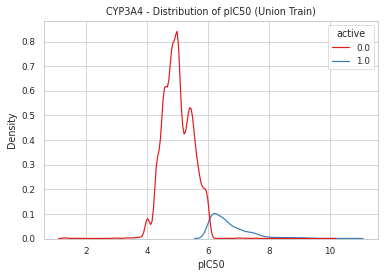

In [54]:
#plot pIC50 distribution based on our 'active' labelling (ModDaC raw)
raw = pd.read_csv(data_dir +target.lower()+'_union_train_smiles_active.csv')
fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(data=raw, x="pIC50", hue="active", palette="Set1")
plt.title(target.upper()+' - Distribution of pIC50 (Union Train)')
plt.xlabel('pIC50')
plt.show()

# Use active_threashold=5 in aggregate_assay_data()

In [55]:
imp.reload(curate_data)
tolerance=10
column='pIC50'   #'pXC50'; #'standard_value'
list_bad_duplicates='Yes'
max_std=1
data=agg_data
print("before",data.shape)
temp_df1=curate_data.aggregate_assay_data(data, value_col=column, output_value_col=None,
                             label_actives=True,
                             active_thresh=5, # val > 5 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                             id_col='compound_id', smiles_col='base_rdkit_smiles', relation_col='relation')
                             #id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')
# Remove inf in curated_df
temp_df1 = temp_df1[~temp_df1.isin([np.inf]).any(1)]
print("after",temp_df1.shape)
temp_df1.head()

before (17796, 8)
after (17796, 5)


,compound_id,base_rdkit_smiles,relation,pIC50,active
0,IFEXCZMSTXWJSK-VQTJNVASSA-N,O=C(Nc1ccc(S(=O)(=O)c2cccc(OC(F)(F)F)c2)cc1)C1...,,6.618848,1
1,IKBHCHNXQACDSM-UBOZLPQGNA-N,CCC1=C(OC(=O)N(CC)CC)N2C(=O)OC(=NCC3CC3)[C@]2(...,,5.300000,1
2,BVMYNIUPRXUZKB-LNNLXFCONA-N,CCCc1ccc(-c2cc(C(=O)NN3CCOCC3)c3ccccc3n2)cc1,<,4.900000,0
3,CHEMBL231609,Cc1cc(C(=O)NC2CCCC2)cc2[nH]c(-c3c(NCC(O)c4cccc...,,5.795880,1
4,RTAOSKPTWQTCBX-GIWSTSDLSA-N,CC(C)(c1ncc(-c2ccccn2)o1)N1CCN(CC(O)CC(Cc2cccc...,,5.301030,1


In [56]:
# Add 'active' column to original data and save file to FRCE
merged = pd.merge(left=union_test_df, right=temp_df1, how='left', left_on='base_rdkit_smiles', right_on='base_rdkit_smiles')
merged = merged.drop(columns=['compound_id_y', 'relation_y', 'pIC50_y'])
merged = merged.rename(columns={'compound_id_x':'compound_id', 'relation_x':'relation', 'pIC50_x':'pIC50'})
print(merged.shape, union_test_df.shape)
print(merged.active.value_counts())
merged.to_csv(data_dir +target.lower()+'_union_train_smiles_active_th5.csv')
merged.head(5)

(17796, 5) (17796, 4)
0.0    9320
1.0    8471
Name: active, dtype: int64


,base_rdkit_smiles,compound_id,pIC50,relation,active
0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN,1.0
1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<,0.0
2,COc1ccc(C(C(=O)NC2CCCC2)N(C(=O)c2snc(-c3ccc(F)...,AMKHNFFZBIGCEX-ZYMSVLFVNA-N,4.900000,<,0.0
3,CN1CCN(CCCN(C(=O)Nc2ccc(F)c(C(F)(F)F)c2)C2CCC3...,CHEMBL1289614,7.300577,NaN,1.0
4,CCOc1cc(C(=O)NC(CC(=O)O)c2ccccc2C)nn1-c1ccccc1F,MLFFCILPEDOIHN-KRWDZBQOSA-N,7.823909,NaN,1.0


# plot pIC50 distribution  with active_threashold=5


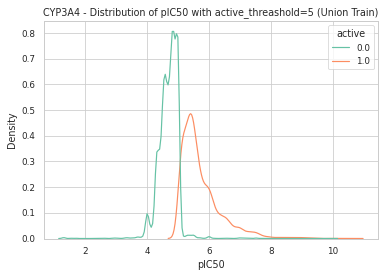

In [57]:
raw = pd.read_csv(data_dir +target.lower()+'_union_train_smiles_active_th5.csv')
fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(data=raw, x="pIC50", hue="active", palette="Set2")
plt.title(target.upper()+' - Distribution of pIC50 with active_threashold=5 (Union Train)')
plt.xlabel('pIC50')
plt.show()